# 🏠 Bengaluru House Price Prediction

In [7]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Load the dataset
df = pd.read_csv("Bengaluru_House_Data.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (13320, 9)
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [9]:
# Data Cleaning
df = df.drop(['area_type', 'availability', 'society'], axis=1)
df.dropna(inplace=True)

In [10]:
# Convert size to bhk
df['bhk'] = df['size'].apply(lambda x: int(x.split()[0]))
df.drop('size', axis=1, inplace=True)

# Convert total_sqft to numeric
def convert_sqft(x):
    try:
        if '-' in x:
            a, b = map(float, x.split('-'))
            return (a + b) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna(subset=['total_sqft'])

In [11]:
# Clean location column
df['location'] = df['location'].str.strip()
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts <= 10].index
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locations else x)

print("\nCleaned dataset shape:", df.shape)
print(df.head())

# Train-Test Split
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set:", X_train.shape, "Test set:", X_test.shape)


Cleaned dataset shape: (12668, 6)
                   location  total_sqft  bath  balcony   price  bhk
0  Electronic City Phase II      1056.0   2.0      1.0   39.07    2
1          Chikka Tirupathi      2600.0   5.0      3.0  120.00    4
2               Uttarahalli      1440.0   2.0      3.0   62.00    3
3        Lingadheeranahalli      1521.0   3.0      1.0   95.00    3
4                  Kothanur      1200.0   2.0      1.0   51.00    2

Training set: (10134, 5) Test set: (2534, 5)


In [12]:
# Preprocessing Pipeline
numeric_features = ['total_sqft', 'bath', 'balcony', 'bhk']
categorical_features = ['location']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [13]:
# Model Training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)
print("\nModel training completed!")



Model training completed!



Model Performance:
Mean Squared Error (MSE): 7175.24
Root Mean Squared Error (RMSE): 84.71
R² Score: 0.666


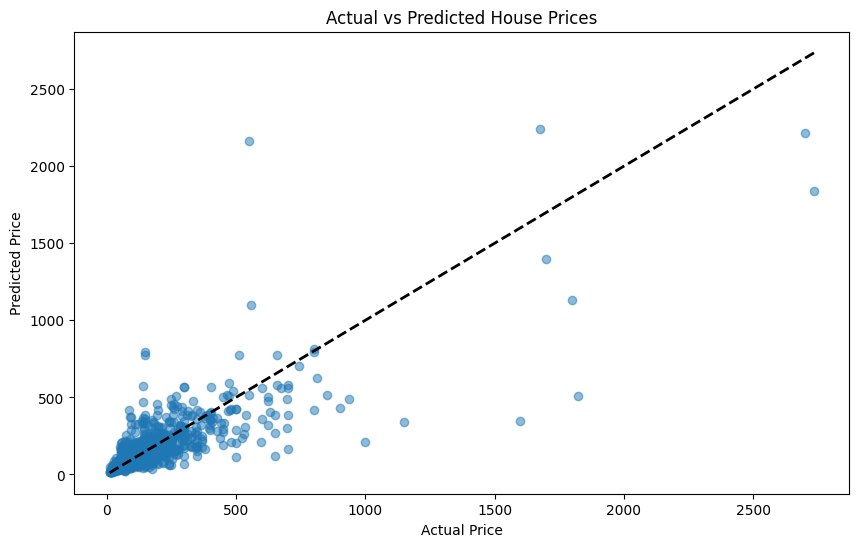

In [14]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [15]:
# Prediction Function
def predict_price(location, sqft, bath, balcony, bhk):
    example = pd.DataFrame([[location, sqft, bath, balcony, bhk]],
                         columns=['location', 'total_sqft', 'bath', 'balcony', 'bhk'])
    prediction = model.predict(example)[0]
    print(f"\nPredicted Price for {bhk}BHK, {sqft} sqft in {location}:")
    print(f"₹{prediction:,.2f} Lakhs")
    return prediction

# Example Predictions
predict_price('Whitefield', 1200, 2, 1, 2)
predict_price('Rajaji Nagar', 1500, 3, 2, 3)
predict_price('Indira Nagar', 1800, 3, 2, 3)


Predicted Price for 2BHK, 1200 sqft in Whitefield:
₹45.60 Lakhs

Predicted Price for 3BHK, 1500 sqft in Rajaji Nagar:
₹122.30 Lakhs

Predicted Price for 3BHK, 1800 sqft in Indira Nagar:
₹122.39 Lakhs


np.float64(122.39)